In [16]:
# %matplotlib widget
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from mplcursors import cursor

base_w = [85]
min_w_arr = [60]
max_w_arr = [90, 95, 100, 105, 110, 115,]

throughput_results = {}
latency_results = {}

throughput_results["min45_base85_max165"] = pd.read_csv('window_test_min45_base85_max165/throughput_modified_general_nested_booking_limit.csv')
latency_results["min45_base85_max165"] = pd.read_csv('window_test_min45_base85_max165/request_metrics_modified_general_nested_booking_limit.csv')

for min_window in min_w_arr:
    for max_window in max_w_arr:
        for base_window in base_w:
            key = f"min{min_window}_base{base_window}_max{max_window}"
            throughput_results[key] = pd.read_csv(f'window_test_min{min_window}_base{base_window}_max{max_window}/throughput_modified_general_nested_booking_limit.csv')
            latency_results[key] = pd.read_csv(f'window_test_min{min_window}_base{base_window}_max{max_window}/request_metrics_modified_general_nested_booking_limit.csv')

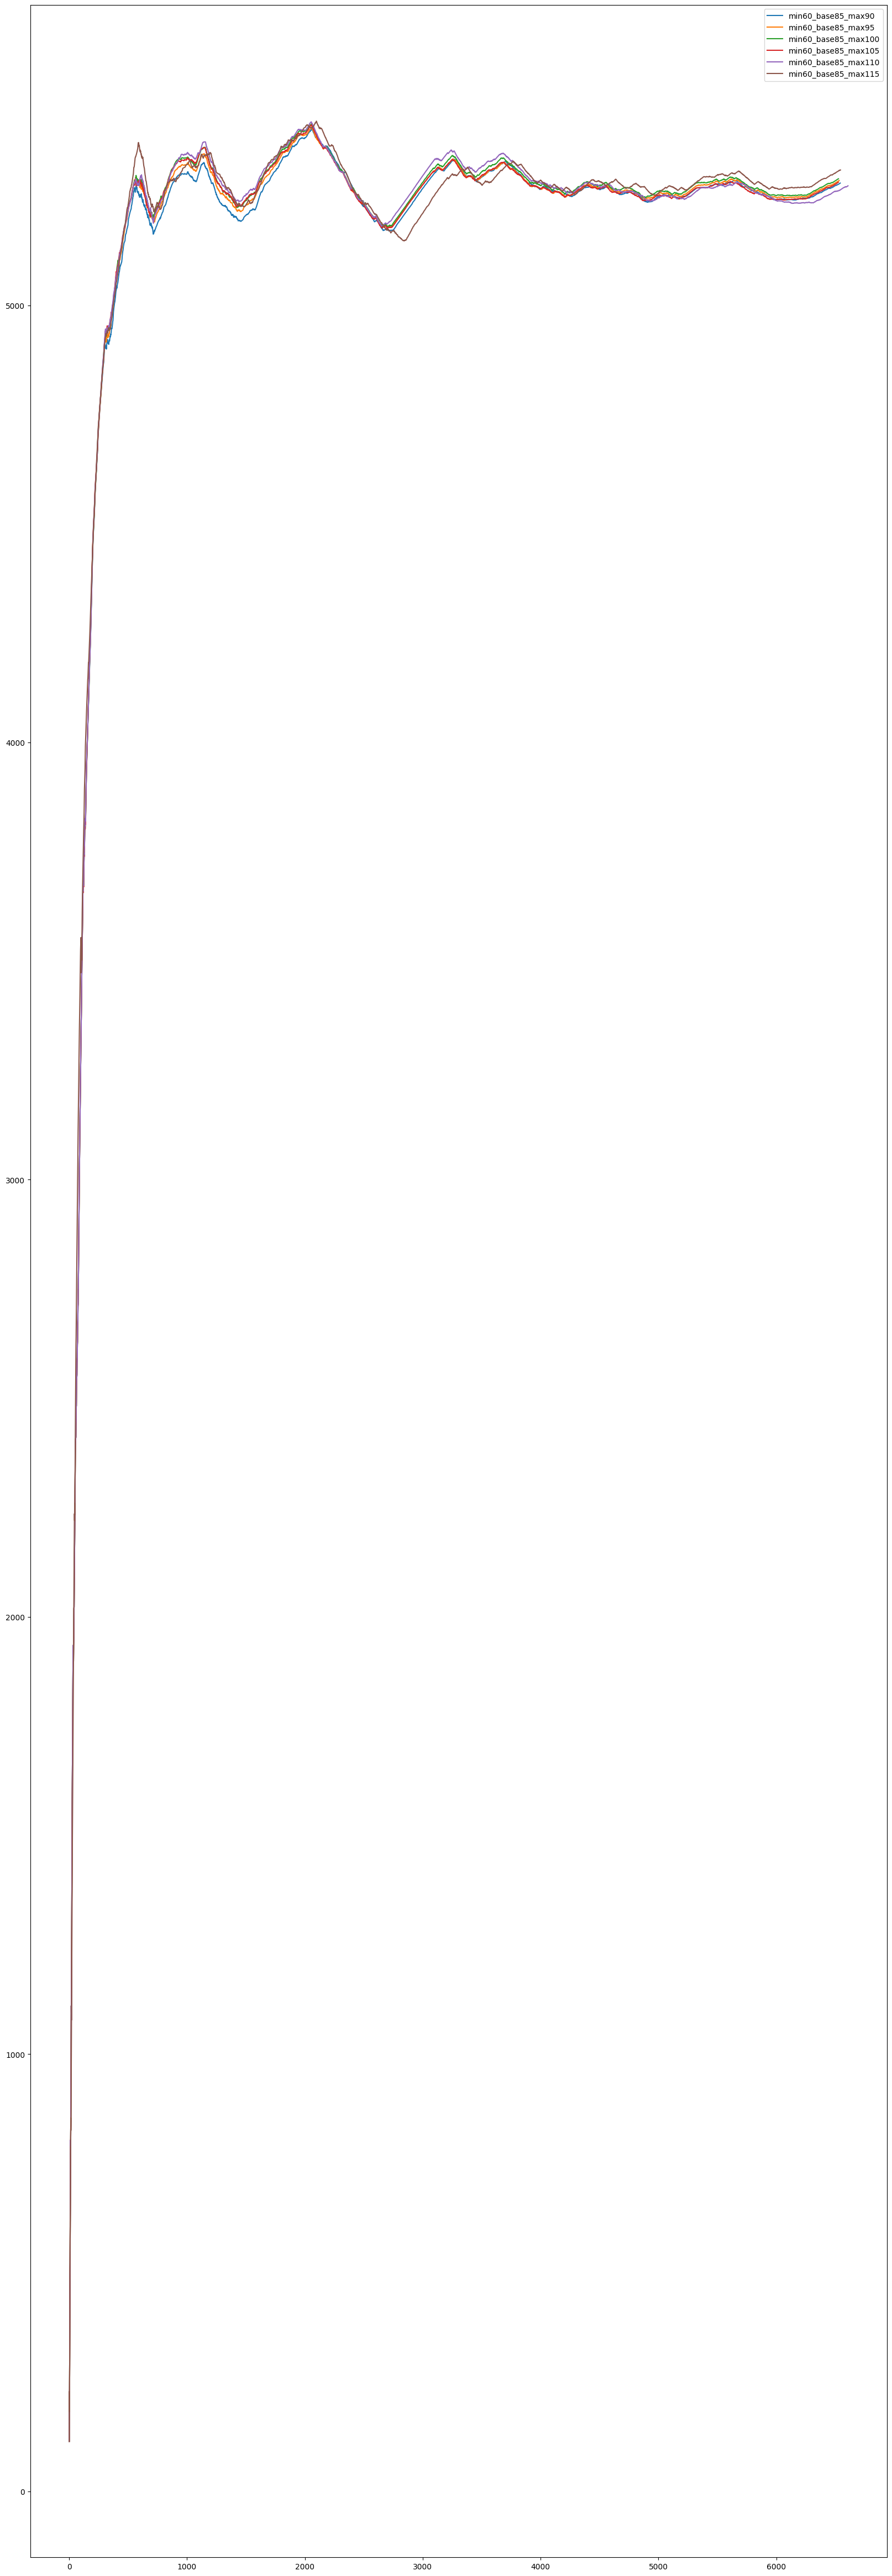

In [17]:
plt.figure(figsize=(20,60))

for min_window in min_w_arr:
    for max_window in max_w_arr:
        for base_window in base_w:
            key = f"min{min_window}_base{base_window}_max{max_window}"
            tp_col1 = throughput_results[key]['Time (sec)']
            tp_col2 = throughput_results[key]['throughput']
            avg_tp = tp_col2/tp_col1
            plt.plot(avg_tp, label = key)

plt.legend()
plt.show()

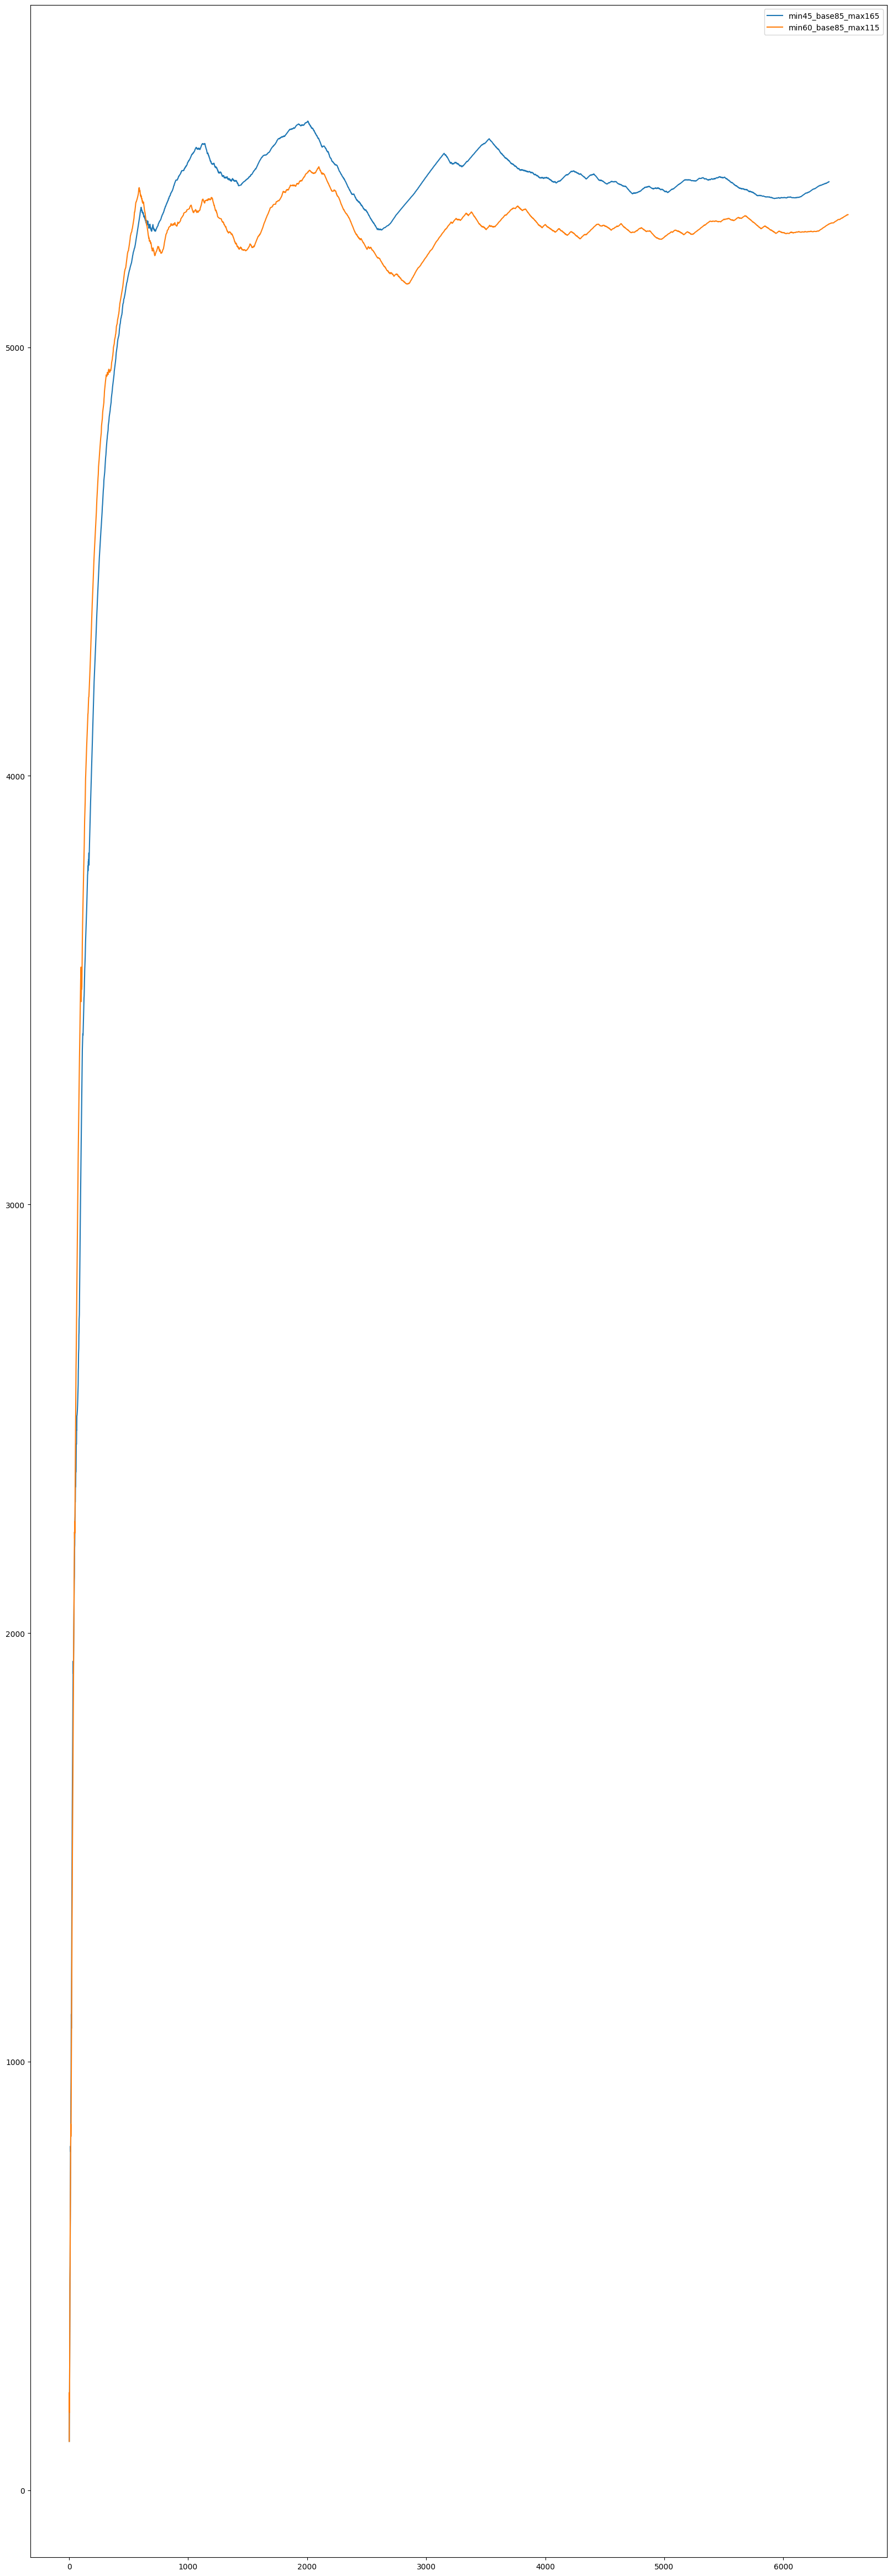

In [20]:
interesting_keys = ["min45_base85_max165", "min60_base85_max115"]

plt.figure(figsize=(20,60))

for k in interesting_keys:
    tp_col1 = throughput_results[k]['Time (sec)']
    tp_col2 = throughput_results[k]['throughput']
    avg_tp = tp_col2/tp_col1
    plt.plot(avg_tp, label = k)

plt.legend()
plt.show()

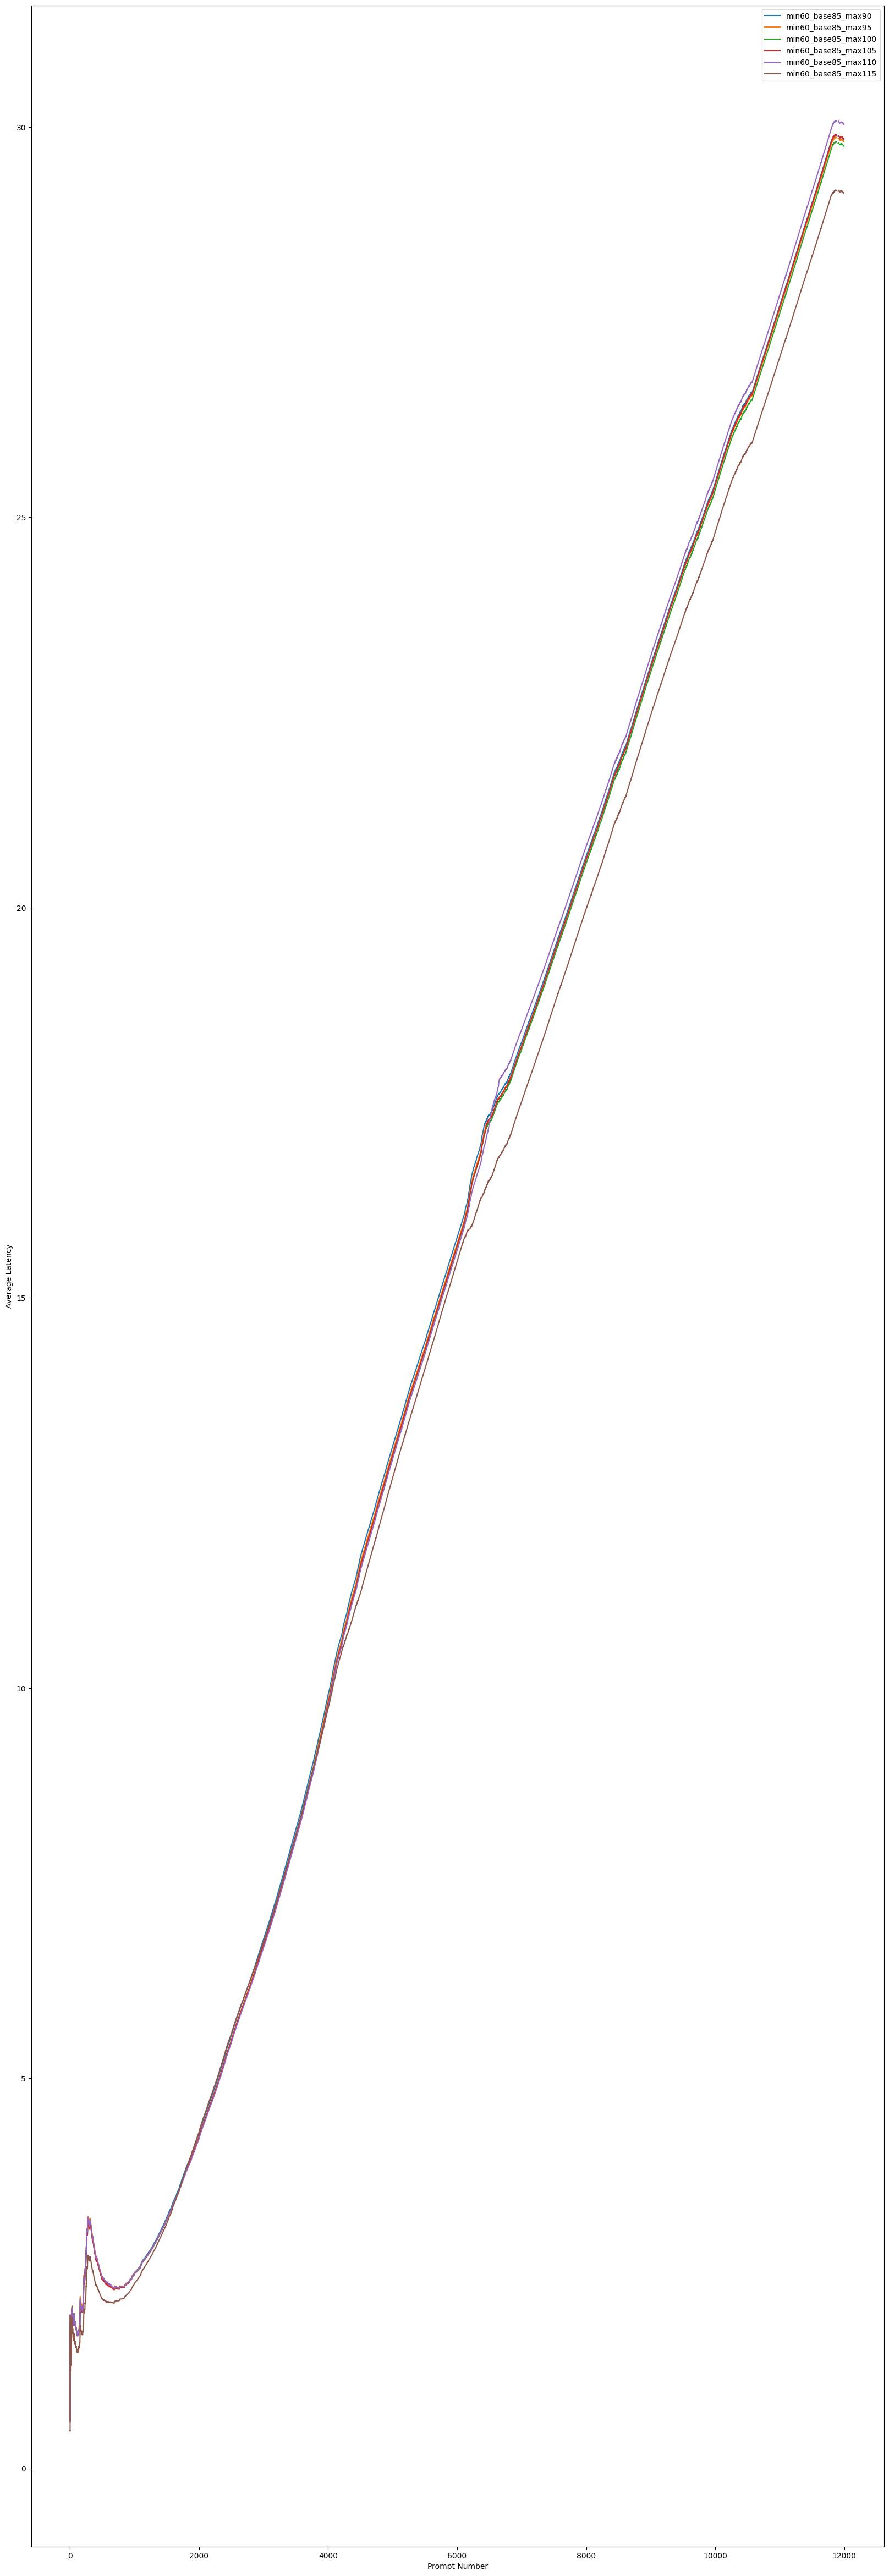

In [19]:
def avg_latency(arr):
    for i in range(len(arr)):
        arr[i]/=(i+1)
    return arr

plt.figure(figsize=(20,60))
plt.xlabel("Prompt Number")
plt.ylabel("Average Latency")

for min_window in min_w_arr:
    for max_window in max_w_arr:
        for base_window in base_w:
            key = f"min{min_window}_base{base_window}_max{max_window}"
            e2e_time = avg_latency(np.cumsum(latency_results[key]['request_e2e_time']))
            plt.plot(e2e_time, label = key, alpha = 1.0)
            # cursor(hover = True)

plt.legend()
plt.show()

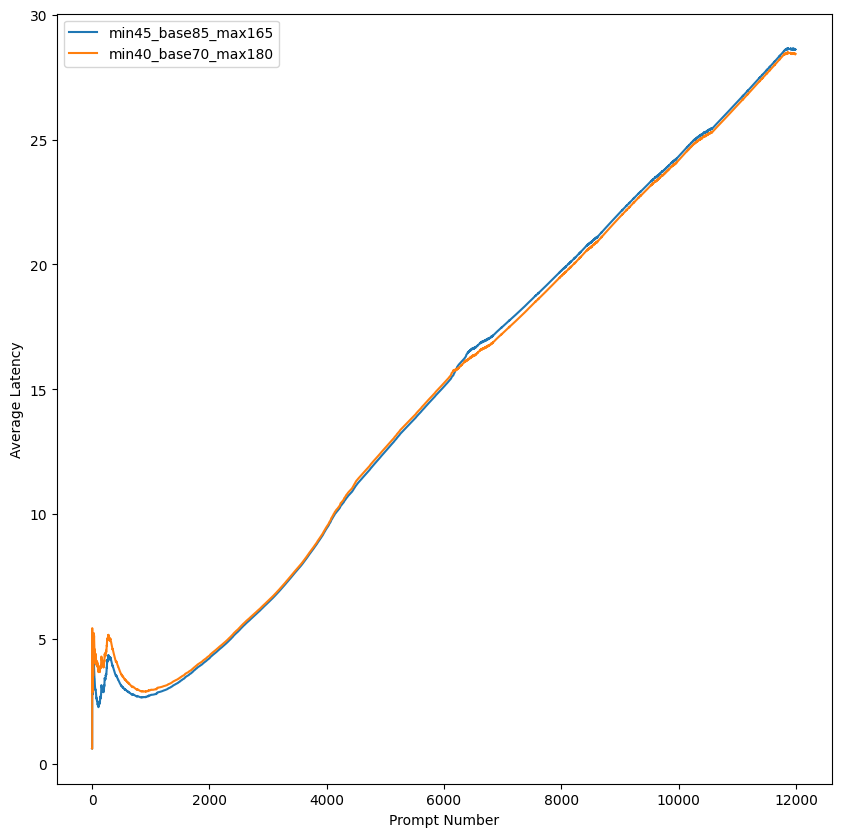

In [14]:
def avg_latency(arr):
    for i in range(len(arr)):
        arr[i]/=(i+1)
    return arr

plt.figure(figsize=(10,10))
plt.xlabel("Prompt Number")
plt.ylabel("Average Latency")

e2e_time_min45_base85_max165 = avg_latency(np.cumsum(latency_results["min45_base85_max165"]['request_e2e_time']))
e2e_time_min40_base70_max180 = avg_latency(np.cumsum(latency_results["min40_base70_max180"]['request_e2e_time']))
# e2e_time_min50_base75_max135 = avg_latency(np.cumsum(latency_results["min50_base75_max135"]['request_e2e_time']))

plt.plot(e2e_time_min45_base85_max165, label = "min45_base85_max165")
plt.plot(e2e_time_min40_base70_max180, label = "min40_base70_max180")
# plt.plot(e2e_time_min50_base75_max135, label = "min50_base75_max135")

plt.legend()
plt.show()